# Determination of a prospective tariff for a telecom company

In this project, the analysis of the data of the Megaline operator, a federal mobile operator, was carried out. The company offers customers two tariff plans: "Smart" and "Ultra". In order to adjust the advertising budget, the commercial department wants to understand which tariff is more profitable.

The tariff of tariffs on a small sample of customers was carried out. The data contains information about 500 Megaline users: who they are, where they are from, what tariff they use, how many calls and messages each sent in 2018. The author analyzed customers' behaviour and concluded revealed the most favourable tariff.

В этом проекте проведен анализ данных оператора «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. 

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Smart Tariff**
 * Ежемесячная плата: 550 рублей
 * Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
 * Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.
 
**Ultra Tariff**
 * Ежемесячная плата: 1950 рублей
 * Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
 * Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.
 

**Note:**

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

## Exploring Data from a File

### General characteristics of the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
from scipy import stats as st
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
users = pd.read_csv('D:/Yandex/datasets/users.csv')
calls = pd.read_csv('D:/Yandex/datasets/calls.csv')
internet = pd.read_csv('D:/Yandex/datasets/internet.csv')
messages = pd.read_csv('D:/Yandex/datasets/messages.csv')
tariffs = pd.read_csv('D:/Yandex/datasets/tariffs.csv')

In [3]:
#users = pd.read_csv('/datasets/users.csv')
#calls = pd.read_csv('/datasets/calls.csv')
#internet = pd.read_csv('/datasets/internet.csv')
#messages = pd.read_csv('/datasets/messages.csv')
#tariffs = pd.read_csv('/datasets/tariffs.csv')

#### Users data

Изучим данные таблицы о пользователях.

In [4]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


**Описание данных:**
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tarif — название тарифного плана

In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**Вывод:** таблица содержит сведения о клиентах, такие как id пользователя, возраст, город, имя и фамлия, название тарифа, дату подключения тарифа, дату прекращения пользования тарифом. Пропущенные значения есть в столбце с датой прекращения пользования тарифом, но они объясняются как информативные, т.е. пользователь еще пользуется тарифом и прекращения не произошло.

In [6]:
users['churn_date'].unique()

array([nan, '2018-10-05', '2018-12-18', '2018-11-21', '2018-10-03',
       '2018-10-14', '2018-12-09', '2018-12-11', '2018-12-26',
       '2018-08-31', '2018-12-03', '2018-12-23', '2018-11-07',
       '2018-12-16', '2018-12-20', '2018-11-30', '2018-12-21',
       '2018-08-17', '2018-09-02', '2018-10-04', '2018-11-13',
       '2018-11-22', '2018-10-28', '2018-11-26', '2018-11-27',
       '2018-11-16', '2018-10-27', '2018-12-30', '2018-09-27',
       '2018-12-25', '2018-12-14', '2018-12-24', '2018-09-26',
       '2018-10-25'], dtype=object)

In [7]:
users['churn_date'].isna().sum()

462

Большая часть данных столбца - пропущенные значения, т.е. в основном эти пользователи продолжают пользоваться тарифом.

In [8]:
users['churn_date'].isnull().sum()

462

In [9]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Описательные статистики можем получить только по столбцам id, age. Возраст клиентов - от 18 до 75 лет, что выглядит правдоподобно, можно судить об отсутствии аномальных значений. Столбец id содержит значения от 1000 до 1499, что также совпадает с объемом выборки в 500 человек, поэтому на первый взгляд здесь нет ошибок и неверных значений.

In [10]:
users.dtypes

user_id        int64
age            int64
churn_date    object
city          object
first_name    object
last_name     object
reg_date      object
tariff        object
dtype: object

Следует изменить тип данных столбцов с датами в тип datetime. Остальные типы данных - верные.

In [11]:
users['tariff'].unique()

array(['ultra', 'smart'], dtype=object)

In [12]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

Важный вывод - количество пользователей на тарифе Смарт (351) более чем в 2 раза превышает пользователей чем с тарифом Ультра (149).

#### Calls data

In [13]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


**Описание данных:**

 * id — уникальный номер звонка
 * call_date — дата звонка
 * duration — длительность звонка в минутах
 * user_id — идентификатор пользователя, сделавшего звонок

In [14]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Вывод: В датасете есть сведения об id звонка (тип - строка) - возможно нужно изменить на числовой тип (но в значениях есть знак подчеркивания), дате звонков (тип нужно изменить на datetime), продолжительности звонка в минутах (float, и нам здесь нужны дробные значения), id клиента в формате int (что связывает с предыдущей таблицей). В таблице нет пропущенных значений!

In [15]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [16]:
calls['id'].unique()

array(['1000_0', '1000_1', '1000_2', ..., '1499_217', '1499_218',
       '1499_219'], dtype=object)

Столбец содержит id клиента и через нижнее подчеркивание - номер его звонка.

Значения в столбце user_id - верные, совпадают с предыдущей таблицей. Продолжительность звонка принимает значения от 0 до 202607 минут, среднее значение - 6,7 минут.

In [17]:
calls['duration'].value_counts()

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
26.94        1
32.19        1
26.32        1
27.41        1
26.90        1
Name: duration, Length: 2871, dtype: int64

Видим большое количество (39613) звонков с нулевой продолжительностью. Это пропущенные звонки, их следует учитывать при анализе, поэтому не будем удалять.

#### Messages data

In [18]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


**Описание данных:**

 * id — уникальный номер звонка
 * message_date — дата сообщения
 * user_id — идентификатор пользователя, отправившего сообщение

In [19]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [20]:
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


Датасет содержит данные о сообщениях, идентификатор сообщения и его дату. Пропущенных значений нет. Тип данных в message_date следует поменять.

#### Internet data

In [21]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [22]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


**Описание данных:**

 * id — уникальный номер сессии
 * mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
 * session_date — дата интернет-сессии
 * user_id — идентификатор пользователя

In [23]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


В таблице есть подозрительный столбец Unnamed: 0 (его следует удалить, возможно он появился при получении сведений из базы данных из столбца с индексами). В таблице 149 396 строк, нет пропущенных значений. Столбец session_date можно привести к типу данных datetime. Количество трафика, потраченного за сессию, варьируется от 0 до 149 393 Мб, среднее значение - 74 697 Мб.

In [24]:
internet['mb_used'].value_counts()

0.00      19598
335.91        9
447.30        9
197.56        9
199.11        8
          ...  
643.43        1
973.04        1
834.51        1
777.30        1
23.72         1
Name: mb_used, Length: 70003, dtype: int64

Видим много интернет сессий с нулвым потреблением трафика. Такое возможно в реальности (ошибочные сессии), поэтому оставим эти данные как есть.

#### Tariffs data

In [25]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [26]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [27]:
tariffs.describe()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


**Описание данных:**

 * tariff_name — название тарифа
 * rub_monthly_fee — ежемесячная абонентская плата в рублях
 * minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
 * messages_included — количество сообщений в месяц, включённых в абонентскую плату
 * mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
 * rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
 * rub_per_message — стоимость отправки сообщения сверх тарифного пакета
 * rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Итак, таблица содержит всего две строки, которые соответствуют двум тарифам. Есть данные о названии, размере абонентской платы, количестве минут, сообщений, трафика, включенных в тариф. Также есть стоимость этих услуг сверх тарифного пакета. Абонентская плата выше у тарифа Ультра, но услуги сверх тарифа стоят дешевле. Также у Ультра больше размер услуг, включенных в тариф.  

Типы данных в датасете корректны, пропущенных значений нет, ничего не нужно менять :)

### Overall Conclusion

**Общий вывод**: есть пять датасетов, два из них - о клинтах и тарифах, три - об услугах (сообщения, звонки, интернет). Только один датасет содержит пропущенные значения, но мы знаем, что они значат (можно не заменять). Что касается типов данных, то во многих датасетах требуется перевод типа в столбцах с датой к формату datetime. В датасете internet требуется удалить лишний столбец.

Выборка составляет 500 клиентов. Всего есть два тарифа. Количество данных в датасетах об услугах:

 * calls - 202 607 (количество звонков)
 * messages 123 036 (количество сообщений)
 * internet - 149 396 (количество интернет-сессий)

Важный вывод - количество пользователей на тарифе Смарт (351) более чем в 2 раза превышает пользователей с тарифом Ультра (149).

## Data preparation

### Casting data to the correct type and correcting data errors

На этапе предварительного ознакомления с данными стало понятно, что некоторые столбцы, которые содержат сведения о датах, должны быть переведены в формат datetime. Поэтому в этом параграфе:
 * переведем нужные столбцы в нужный формат;
 * удалим лишний столбец в датасете "интернет".

#### Casting data to datetime type

Напишем функцию для изменения типа на datetime и применим ее к необходимым столбцам.

In [28]:
def convert_to_datetime(df, column):
    df[column] = pd.to_datetime(df[column], format='%Y-%m-%dT%H:%M')

In [29]:
convert_to_datetime(users, 'churn_date')

In [30]:
convert_to_datetime(users, 'reg_date')

In [31]:
convert_to_datetime(calls, 'call_date')

In [32]:
convert_to_datetime(messages, 'message_date')

In [33]:
convert_to_datetime(internet, 'session_date')

Проверим, поменялся ли тип данных:

In [34]:
users.dtypes

user_id                int64
age                    int64
churn_date    datetime64[ns]
city                  object
first_name            object
last_name             object
reg_date      datetime64[ns]
tariff                object
dtype: object

In [35]:
calls.dtypes

id                   object
call_date    datetime64[ns]
duration            float64
user_id               int64
dtype: object

In [36]:
messages.dtypes

id                      object
message_date    datetime64[ns]
user_id                  int64
dtype: object

In [37]:
internet.dtypes

Unnamed: 0               int64
id                      object
mb_used                float64
session_date    datetime64[ns]
user_id                  int64
dtype: object

Итак, тип данных был изменен успешно.

#### Correction of data errors

In [38]:
internet.columns

Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')

In [39]:
internet['Unnamed: 0']

0              0
1              1
2              2
3              3
4              4
           ...  
149391    149391
149392    149392
149393    149393
149394    149394
149395    149395
Name: Unnamed: 0, Length: 149396, dtype: int64

Данный столбец действительно дублирует индекс, удалим его.

In [40]:
del internet['Unnamed: 0']

In [41]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


#### Rounding call duration

Здесь округлим продолжительность звонков вверх из-за особенностей тарификации оператора.

In [42]:
calls['duration'] = np.ceil(calls['duration'])

In [43]:
calls.head(10) # проверка

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
5,1000_5,2018-11-02,0.0,1000
6,1000_6,2018-10-18,0.0,1000
7,1000_7,2018-08-22,19.0,1000
8,1000_8,2018-09-15,19.0,1000
9,1000_9,2018-08-15,0.0,1000


In [44]:
calls.rename(columns = {'duration': 'calls_duration'}, inplace = True)

In [45]:
calls.head(10) # check

,id,call_date,calls_duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
5,1000_5,2018-11-02,0.0,1000
6,1000_6,2018-10-18,0.0,1000
7,1000_7,2018-08-22,19.0,1000
8,1000_8,2018-09-15,19.0,1000
9,1000_9,2018-08-15,0.0,1000


### Preparation of user data (calls, sms, traffic volume, etc.)

Посчитаем для каждого пользователя:

 * количество сделанных звонков и израсходованных минут разговора по месяцам;
 * количество отправленных сообщений по месяцам;
 * объем израсходованного интернет-трафика по месяцам;
 * помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет- трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

#### Объединение датасетов

Объединим данных из всех датасетов для облегчения расчетов. Сначала сгруппируем пользовательские данные по идентификатору пользователя и месяцу, затем объединим их с помощью методом merge(), затем добавим данные по пользователям и тарифам. Затем произведем по объединенной таблице расчеты помесячной выручки.

##### Группирование данных по звонкам

In [46]:
calls['month'] = calls['call_date'].dt.month

In [47]:
calls['year'] = calls['call_date'].dt.year

In [48]:
calls['year'].unique()

array([2018], dtype=int64)

In [49]:
calls.groupby(['user_id','month']).agg(calls_duration=('calls_duration','sum')).reset_index()

,user_id,month,calls_duration
0,1000,5,159.0
1,1000,6,172.0
2,1000,7,340.0
3,1000,8,408.0
4,1000,9,466.0
...,...,...,...
3169,1498,10,247.0
3170,1499,9,70.0
3171,1499,10,449.0
3172,1499,11,612.0


In [50]:
calls_duration = calls.copy()

In [51]:
calls_copy = calls.groupby(['user_id','month'], as_index=False).agg(calls_duration=('calls_duration','sum'))

In [52]:
calls_copy.head()

,user_id,month,calls_duration
0,1000,5,159.0
1,1000,6,172.0
2,1000,7,340.0
3,1000,8,408.0
4,1000,9,466.0


In [53]:
calls = calls.groupby(['user_id', 'month'], as_index=False).agg({'calls_duration': 'sum'}) 

In [54]:
calls.head()

,user_id,month,calls_duration
0,1000,5,159.0
1,1000,6,172.0
2,1000,7,340.0
3,1000,8,408.0
4,1000,9,466.0


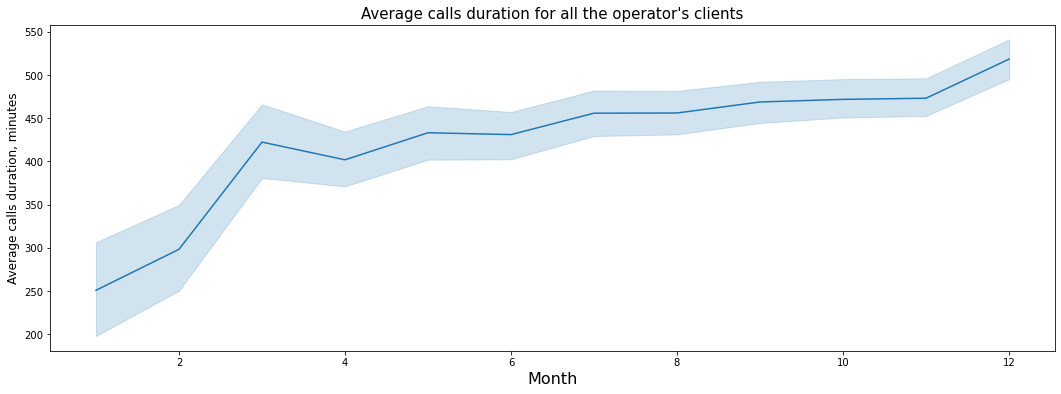

In [55]:
plt.figure(figsize=(18, 6))
plt.title("Average calls duration for all the operator's clients", fontsize=15)
sns.lineplot(x='month', y='calls_duration', data=calls)
plt.xlabel('Month',fontsize=16)
plt.ylabel('Average calls duration, minutes',fontsize=12)
plt.show()

Итак, данные по звонкам были сгруппированы. График показывает, что **средняя** продолжительность звонков растет из месяца в месяц.

##### Группирование данных по интернет-трафику

In [56]:
#internet['month'] = internet['session_date'].apply(lambda x: x.month) #добавили месяц
internet['month'] = internet['session_date'].dt.month
internet['year'] = internet['session_date'].dt.year

In [57]:
internet['year'].unique()

array([2018], dtype=int64)

In [58]:
#internet = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()
internet = internet.groupby(['user_id', 'month'], as_index=False).agg({'mb_used': 'sum'})

In [59]:
internet.head()

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


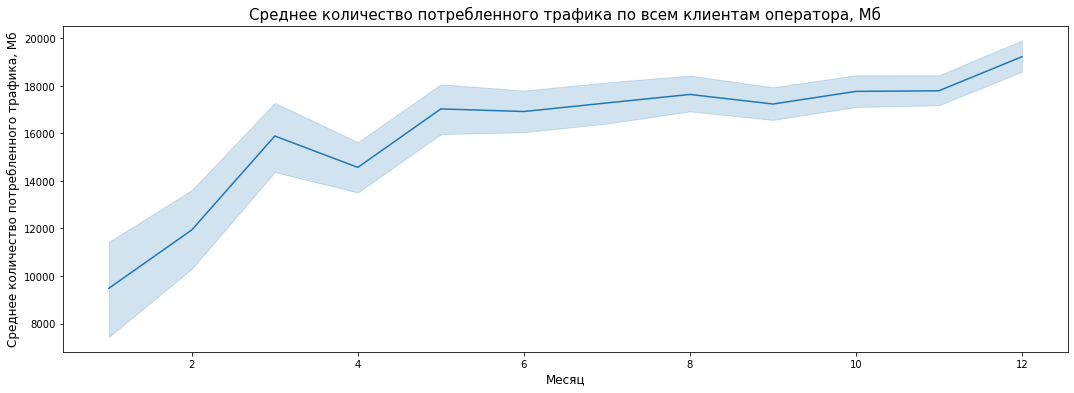

In [60]:
plt.figure(figsize=(18, 6))
plt.title('Среднее количество потребленного трафика по всем клиентам оператора, Мб', fontsize=15)
sns.lineplot(x='month', y='mb_used', data=internet)
plt.xlabel('Месяц',fontsize=12)
plt.ylabel('Среднее количество потребленного трафика, Мб', fontsize=12)
plt.show()

В датасет по интернету был добавлен столбец с месяцем, проведена группировка. Объемы потребленного трафика также растут.

##### Группирование данных по сообщениям

In [61]:
#messages['month'] = messages['message_date'].apply(lambda x: x.month) #добавили месяц
messages['month'] = messages['message_date'].dt.month
messages['year'] = messages['message_date'].dt.year

In [62]:
messages['year'].unique()

array([2018], dtype=int64)

In [63]:
messages = messages.groupby(['user_id', 'month']).agg({'id': 'count'}).reset_index()

In [64]:
messages

,user_id,month,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [65]:
messages.columns = ['user_id', 'month', 'messages_count']

In [66]:
messages.head()

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


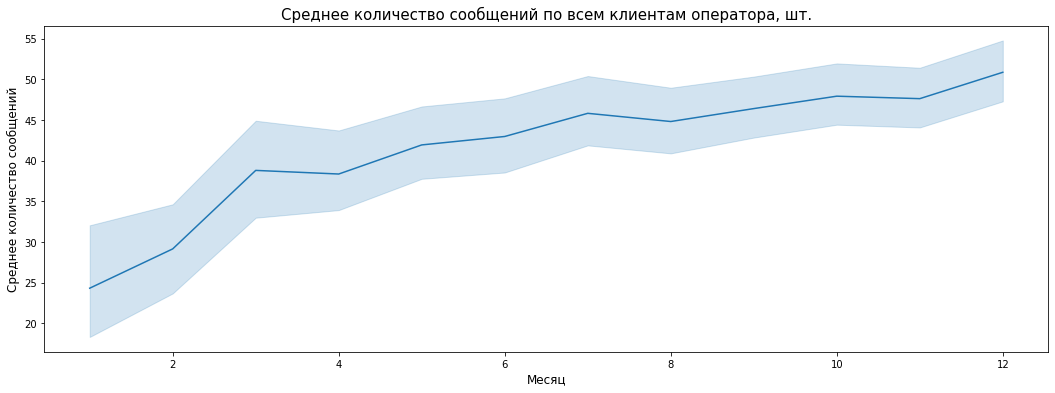

In [67]:
plt.figure(figsize=(18, 6))
plt.grid = True
plt.title('Среднее количество сообщений по всем клиентам оператора, шт.', fontsize=15)
sns.lineplot(x='month', y='messages_count', data=messages)
plt.xlabel('Месяц',fontsize=12)
plt.ylabel('Среднее количество сообщений', fontsize=12)
plt.show()

Аналогичная работа проделана с данными о сообщениях. Полученные выводы также свидетельствуют о восходящей тенденции роста среднего количества сообщений по месяцам.

#### Создание общего датасета

Объединим сначала данные по звонкам и интернету методом merge()

In [68]:
telecom_data = calls.merge(internet, on = ['user_id', 'month'], how = 'outer')

In [69]:
telecom_data = telecom_data.merge(messages, on = ['user_id', 'month'], how = 'outer') 

In [70]:
telecom_data.head() # проверка

,user_id,month,calls_duration,mb_used,messages_count
0,1000,5,159.0,2253.49,22.0
1,1000,6,172.0,23233.77,60.0
2,1000,7,340.0,14003.64,75.0
3,1000,8,408.0,14055.93,81.0
4,1000,9,466.0,14568.91,57.0


Теперь в таблице собраны все данные о потребленных услугах (продолжительность звонков в минутах, объем потребленного трафика в Мб, количество сообщений)

Добавим данные о клиентах и о тарифах в полученную таблицу.

In [71]:
telecom_data = telecom_data.merge(users, on = ['user_id'], how = 'outer') 

In [72]:
telecom_data.isna().sum()

user_id              0
month                2
calls_duration      42
mb_used             13
messages_count     499
age                  0
churn_date        3027
city                 0
first_name           0
last_name            0
reg_date             0
tariff               0
dtype: int64

Переименуем столбец в таблице с тарифами, чтобы объединить по нему.

In [73]:
tariffs.rename(columns = {'tariff_name':'tariff'}, inplace = True)

In [74]:
telecom_data = telecom_data.merge(tariffs, on = ['tariff'], how = 'outer') 

In [75]:
telecom_data.head() # проверка итоговой таблицы

,user_id,month,calls_duration,mb_used,messages_count,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,159.0,2253.49,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,172.0,23233.77,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,340.0,14003.64,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,408.0,14055.93,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,466.0,14568.91,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [76]:
telecom_data.tail() # проверка итоговой таблицы

,user_id,month,calls_duration,mb_used,messages_count,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
3211,1489,9.0,NaN,17206.30,32.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3212,1489,10.0,NaN,19559.44,21.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3213,1489,11.0,NaN,17491.56,20.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3214,1489,12.0,NaN,17322.51,35.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3215,1371,NaN,NaN,NaN,NaN,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,50,15360,500,550,200,3,3


Данные объединились корректно, но появились пропущенные значения.

In [77]:
telecom_data.columns

Index(['user_id', 'month', 'calls_duration', 'mb_used', 'messages_count',
       'age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date',
       'tariff', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message',
       'rub_per_minute'],
      dtype='object')

In [78]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   month                  3214 non-null   float64       
 2   calls_duration         3174 non-null   float64       
 3   mb_used                3203 non-null   float64       
 4   messages_count         2717 non-null   float64       
 5   age                    3216 non-null   int64         
 6   churn_date             189 non-null    datetime64[ns]
 7   city                   3216 non-null   object        
 8   first_name             3216 non-null   object        
 9   last_name              3216 non-null   object        
 10  reg_date               3216 non-null   datetime64[ns]
 11  tariff                 3216 non-null   object        
 12  messages_included      3216 non-null   int64         
 13  mb_

In [79]:
telecom_data.isna().sum()

user_id                     0
month                       2
calls_duration             42
mb_used                    13
messages_count            499
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

Пропущенные значения в столбцах со звонками, интернетом, сообщениями можно заменить на нули, т.к. потребления этих услуг не было.

In [80]:
services_list = ['calls_duration', 'mb_used', 'messages_count'] # сделать филлна нули

In [81]:
#for column in services_list:
    #telecom_data[column].fillna(0, inplace=True)    

In [82]:
telecom_data_copy = telecom_data.copy()

In [83]:
telecom_data_copy[services_list].fillna(0, inplace=True)

In [84]:
# Код ревьюера
telecom_data_copy[services_list] = telecom_data_copy[services_list].fillna(0)

In [85]:
telecom_data_copy.isna().sum()

user_id                     0
month                       2
calls_duration              0
mb_used                     0
messages_count              0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [86]:
for column in services_list:
    telecom_data[column].fillna(0, inplace=True)   

In [87]:
telecom_data.isna().sum()

user_id                     0
month                       2
calls_duration              0
mb_used                     0
messages_count              0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

Итак, в этом разделе была создана общая таблица из всех датасетов с нужной информацией. Можно переходить к расчету выручки.

#### Расчет ежемесячной выручки

Проведем расчеты следующих показателей:

 * количество сделанных звонков и израсходованных минут разговора по месяцам;
 * количество отправленных сообщений по месяцам;
 * объем израсходованного интернет-трафика по месяцам;
 * помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет- трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

In [88]:
telecom_data.head()

,user_id,month,calls_duration,mb_used,messages_count,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,159.0,2253.49,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,172.0,23233.77,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,340.0,14003.64,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,408.0,14055.93,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,466.0,14568.91,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


##### Выручка по звонкам

Найдем месячную выручку по звонкам, а затем уберем отрицательные значения.

Тип данных в calls_duration был float (детализация до секунд), но из-за специфики тарификации округлим эти данные вверх:

In [89]:
telecom_data['revenue_calls'] = ((telecom_data['calls_duration'] - telecom_data['minutes_included']) *
                                    telecom_data['rub_per_minute']).clip(lower=0)

In [90]:
telecom_data

,user_id,month,calls_duration,mb_used,messages_count,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_calls
0,1000,5.0,159.0,2253.49,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0
1,1000,6.0,172.0,23233.77,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0
2,1000,7.0,340.0,14003.64,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0
3,1000,8.0,408.0,14055.93,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0
4,1000,9.0,466.0,14568.91,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,9.0,0.0,17206.30,32.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,0.0
3212,1489,10.0,0.0,19559.44,21.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,0.0
3213,1489,11.0,0.0,17491.56,20.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,0.0
3214,1489,12.0,0.0,17322.51,35.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,0.0


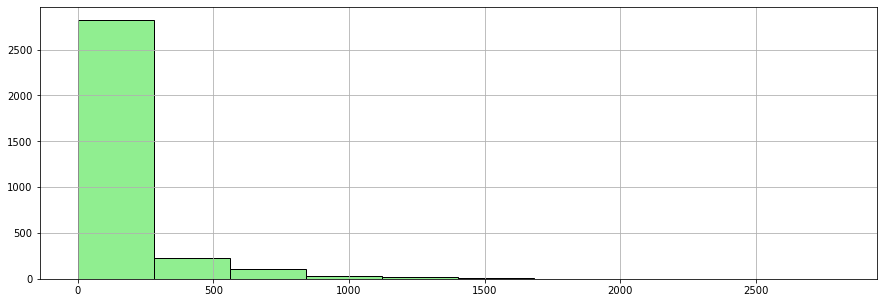

In [91]:
telecom_data['revenue_calls'].hist(figsize=(15,5), ec='black', color='lightgreen')
plt.show()

Мы видим, что чаще всего пользователи используют лимит звонков внутри тарифа и не оплачивают дополнительные звонки. 

##### Выручка по сообщениям

Также поступим с данными по сообщениям.

In [92]:
#telecom_data['revenue_messages'] = (telecom_data['messages_count'] - telecom_data ['messages_included']) * telecom_data ['rub_per_message']
#telecom_data.loc[telecom_data['revenue_messages'] < 0, 'revenue_messages'] = 0

In [93]:
telecom_data['revenue_messages'] = ((telecom_data['messages_count'] - telecom_data['messages_included']) *
                                    telecom_data['rub_per_message']).clip(lower=0)

In [94]:
telecom_data.head()

,user_id,month,calls_duration,mb_used,messages_count,age,churn_date,city,first_name,last_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_calls,revenue_messages
0,1000,5.0,159.0,2253.49,22.0,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0
1,1000,6.0,172.0,23233.77,60.0,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0
2,1000,7.0,340.0,14003.64,75.0,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0
3,1000,8.0,408.0,14055.93,81.0,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0
4,1000,9.0,466.0,14568.91,57.0,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0


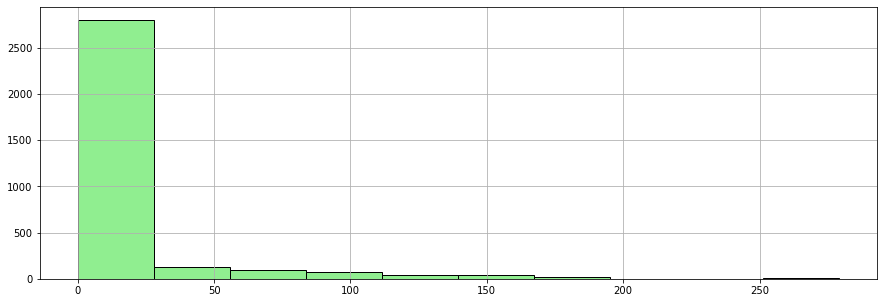

In [95]:
telecom_data['revenue_messages'].hist(figsize=(15,5), ec='black', color='lightgreen')
plt.show()

Аналогичная ситуация с оплатой дополнительных услуг по сообщениям: чаще всего плата равна нулю.

##### Выручка по интернет трафику

In [96]:
telecom_data['revenue_internet'] = np.ceil((telecom_data['mb_used'] - telecom_data ['mb_per_month_included']) / 1024) * telecom_data['rub_per_gb']
telecom_data.loc[telecom_data['revenue_internet'] < 0, 'revenue_internet'] = 0

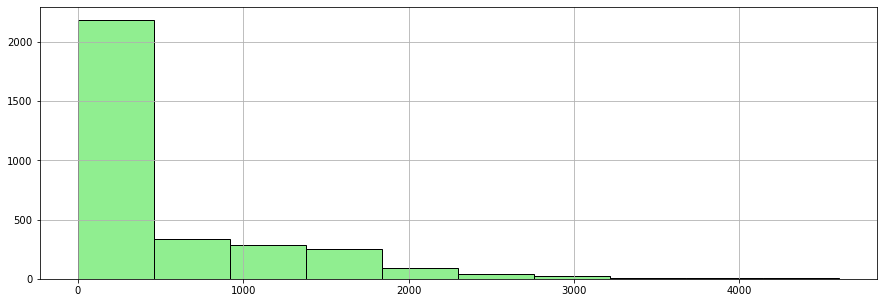

In [97]:
telecom_data['revenue_internet'].hist(figsize=(15,5), ec='black', color='lightgreen')
plt.show()

В случае с трафиком, также чаще всего пользователям хватает трафика внутри пакета, но в отличии от звонков и сообщений показатели небольшой платы здесь выше.

##### Общая выручка

Посчитаем общую выручку.

Отдельно вычислим выручку от дополнительных услуг свех лимита, чтобы рассмотреть ее распределение.

In [98]:
telecom_data['over_the_tariff'] = telecom_data['revenue_calls'] + telecom_data['revenue_internet'] + telecom_data['revenue_messages']

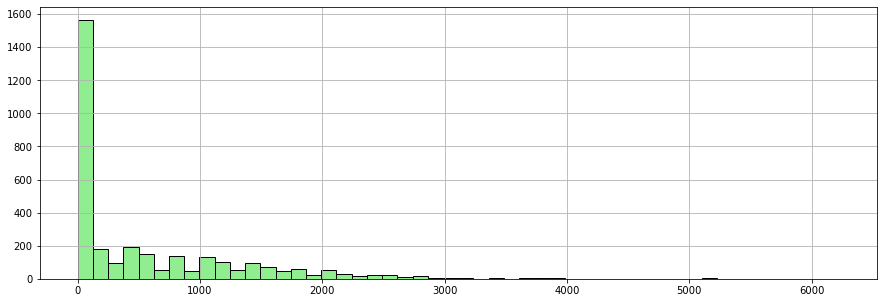

In [99]:
telecom_data['over_the_tariff'].hist(bins=50, figsize=(15,5), ec='black', color='lightgreen')
plt.show()

In [100]:
telecom_data[telecom_data['over_the_tariff'] > 0].describe()

,user_id,month,calls_duration,mb_used,messages_count,age,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_calls,revenue_messages,revenue_internet,over_the_tariff
count,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000
mean,1247.517817,8.711024,477.916481,19702.948124,39.784521,46.625278,120.879733,16506.013363,686.525612,654.454343,196.269488,2.850780,2.850780,154.909243,21.594655,807.767261,984.271158
std,144.654179,2.717428,195.809568,6592.809554,32.975821,16.551781,249.692859,4037.139273,657.086470,367.968423,13.141729,0.525669,0.525669,274.658453,43.908571,741.452368,792.134669
min,1001.000000,1.000000,0.000000,2000.460000,0.000000,18.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000
25%,1127.000000,7.000000,343.000000,15890.985000,13.000000,32.000000,50.000000,15360.000000,500.000000,550.000000,200.000000,3.000000,3.000000,0.000000,0.000000,200.000000,400.000000
50%,1244.000000,9.000000,481.500000,18662.515000,35.000000,47.000000,50.000000,15360.000000,500.000000,550.000000,200.000000,3.000000,3.000000,0.000000,0.000000,600.000000,800.000000
75%,1376.000000,11.000000,597.000000,22018.887500,60.000000,62.000000,50.000000,15360.000000,500.000000,550.000000,200.000000,3.000000,3.000000,225.000000,21.000000,1200.000000,1400.000000
max,1499.000000,12.000000,1435.000000,49745.690000,224.000000,75.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,2805.000000,279.000000,4600.000000,6220.000000


Добавим категоризацию в зависимости от того, зафиксирована ли оплата дополнительных услуг, где 1 - это да, 0 -нет.

In [101]:
def is_over_tariff(row):
    if row['over_the_tariff'] > 0:
        return 1
    else:
        return 0

In [102]:
telecom_data['is_over_tariff'] = telecom_data.apply(is_over_tariff, axis=1)

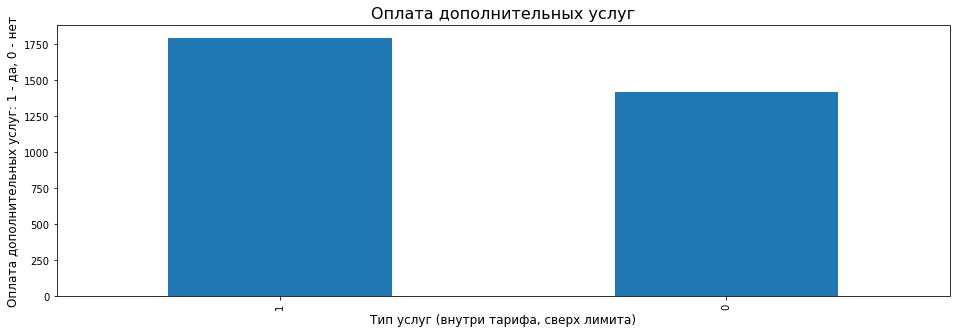

In [103]:
plt.figure(figsize=(16, 5))
plt.grid = True
plt.title('Оплата дополнительных услуг', fontsize=16) # задаём общий заголовок

telecom_data['is_over_tariff'].value_counts().plot(kind='bar')

plt.xlabel('Тип услуг (внутри тарифа, сверх лимита)',fontsize=12)
plt.ylabel('Оплата дополнительных услуг: 1 - да, 0 - нет', fontsize=12)
plt.show()

Мы видим, что в выручке достаточно велика доля дополнительных услуг.

In [104]:
telecom_data['revenue_total'] = telecom_data['over_the_tariff'] + telecom_data['rub_monthly_fee']

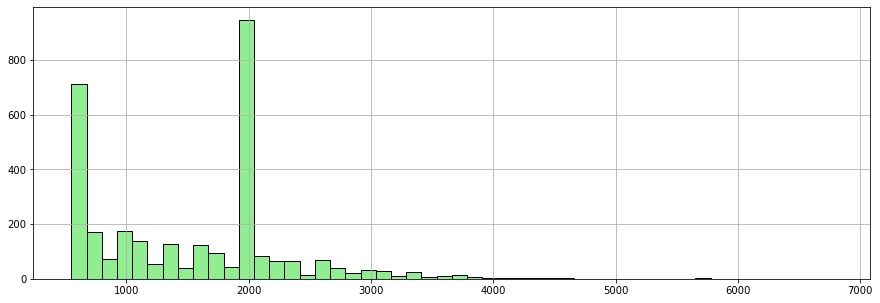

In [105]:
telecom_data['revenue_total'].hist(bins=50, figsize=(15,5), ec='black', color='lightgreen')
plt.show()

На графике мы видим пики, равные размеру абонентской платы, это означает, что чаще всего пользователи оплчивают компании только плату внутри тарифа.

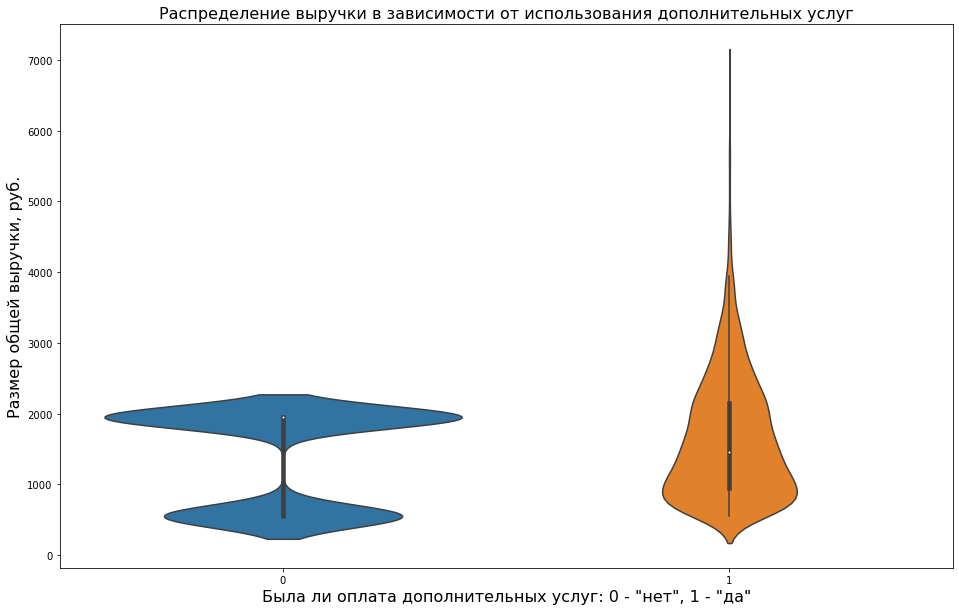

In [106]:
plt.figure(figsize=(16, 10))
plt.grid = True
plt.title('Распределение выручки в зависимости от использования дополнительных услуг', fontsize=16) # задаём общий заголовок

sns.violinplot(x="is_over_tariff", y="revenue_total", data=telecom_data)

plt.xlabel('Была ли оплата дополнительных услуг: 0 - "нет", 1 - "да"',fontsize=16)
plt.ylabel('Размер общей выручки, руб.', fontsize=16)
plt.show()

Были сложены столбцы с выручкой по отдельным услугам и абонентская плата согласно тарифу.

In [107]:
telecom_data['revenue_total'].describe()

count    3216.000000
mean     1528.902674
std       798.224060
min       550.000000
25%       750.000000
50%      1653.500000
75%      1950.000000
max      6770.000000
Name: revenue_total, dtype: float64

В этой главе проделана следующая работа: данные в отдельных таблицах были сгруппированы и объединены в один общий датасет. Посчитана общая выручка и выручка в разрезе по услугам оператора. Общая выручка варьируется от 550 руб. в месяц (стоимость самого дешевого тарифа без овердрафта по включенным услугам) до 6613,1 руб.

## Exploratory data analysis

Опишем поведение клиентов оператора, исходя из выборки. 
 * Посмотрим, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
 * Посчитаем среднее количество, дисперсию и стандартное отклонение. 
 * Построим гистограммы. 
 * Опишем распределения.

### Анализ использования услуг оператора по пользователям

Рассмотрим,  сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Сгруппируем данные из основной таблицы.

In [108]:
telecom_data.groupby('tariff').agg({'messages_count':'sum', 'calls_duration': 'sum', 'mb_used': 'sum'})

,messages_count,calls_duration,mb_used
tariff,,,
smart,74413.0,931577.0,36128494.60
ultra,48623.0,518724.0,19176773.13


In [109]:
#telecom_data.groupby('tariff').agg({'messages_count':'sum', 'calls_duration': 'sum', 'mb_used': 'sum'}).plot(kind='bar')
#plt.show()

Рассмотрим далее данные более подробно в разрезе отдельных услуг.

#### Анализ данных по звонкам

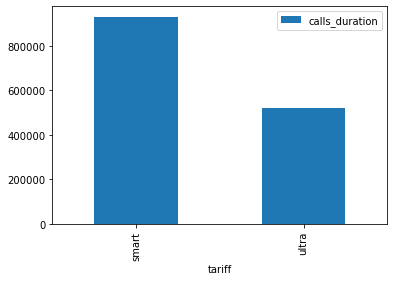

In [110]:
telecom_data.groupby('tariff').agg({'calls_duration': 'sum'}).plot(kind='bar')
plt.show()

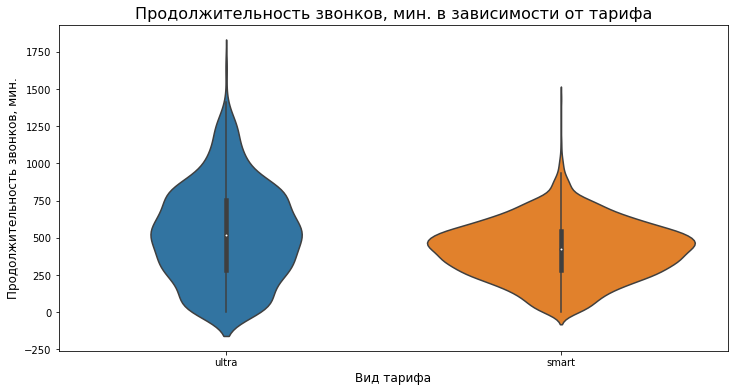

In [111]:
plt.figure(figsize=(12, 6))
plt.grid = True
plt.title('Продолжительность звонков, мин. в зависимости от тарифа', fontsize=16) # задаём общий заголовок

sns.violinplot(x="tariff", y="calls_duration", data=telecom_data)

plt.xlabel('Вид тарифа',fontsize=12)
plt.ylabel('Продолжительность звонков, мин.', fontsize=12)
plt.show()

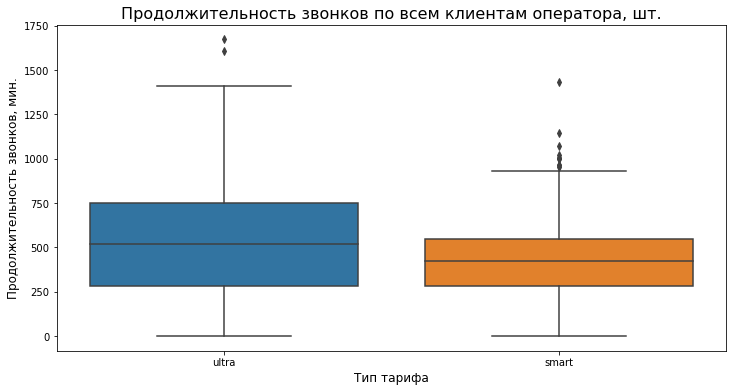

In [112]:
plt.figure(figsize=(12, 6))
plt.grid = True
plt.title('Продолжительность звонков по всем клиентам оператора, шт.', fontsize=16) # задаём общий заголовок

sns.boxplot(x="tariff", y="calls_duration", data=telecom_data)

plt.xlabel('Тип тарифа',fontsize=12)
plt.ylabel('Продолжительность звонков, мин.', fontsize=12)
plt.show()

Мы видим, что суммарная длительность звонков выше при использовании тарифа "Смарт" (880 282 мин.), чем при использовании тарифа "Ультра" (74 413 мин.)

#### Анализ данных по сообщениям

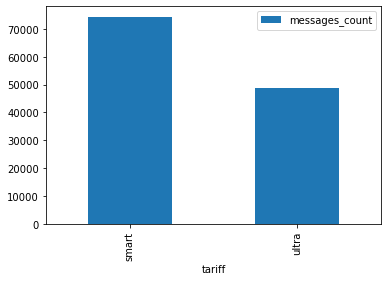

In [113]:
telecom_data.groupby('tariff').agg({'messages_count':'sum'}).plot(kind='bar')
plt.show()

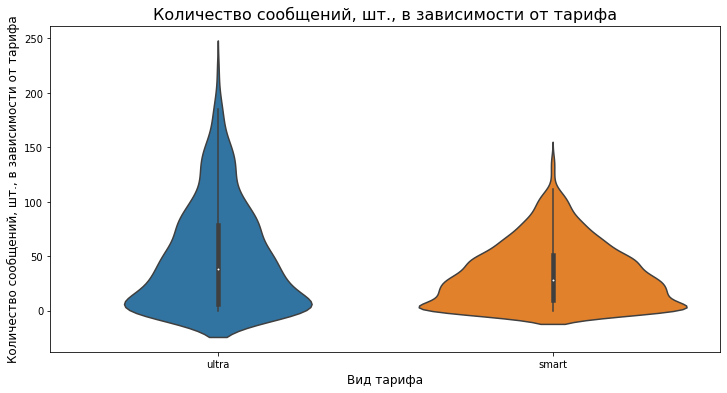

In [114]:
plt.figure(figsize=(12, 6))
plt.grid = True
plt.title('Количество сообщений, шт., в зависимости от тарифа', fontsize=16) # задаём общий заголовок

sns.violinplot(x="tariff", y="messages_count", data=telecom_data)

plt.xlabel('Вид тарифа',fontsize=12)
plt.ylabel('Количество сообщений, шт., в зависимости от тарифа', fontsize=12)
plt.show()

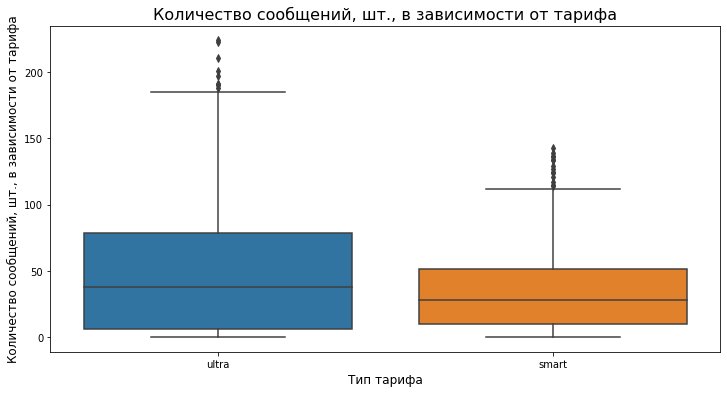

In [115]:
plt.figure(figsize=(12, 6))
plt.grid = True
plt.title('Количество сообщений, шт., в зависимости от тарифа', fontsize=16) # задаём общий заголовок

sns.boxplot(x="tariff", y="messages_count", data=telecom_data)

plt.xlabel('Тип тарифа',fontsize=12)
plt.ylabel('Количество сообщений, шт., в зависимости от тарифа', fontsize=12)
plt.show()

Общее количество сообщений также выше на тарифе "Смарт" (более 70 тыс. шт.), чем на "Ультра" (около 50 тыс. шт.)

#### Анализ данных по интернет-трафику

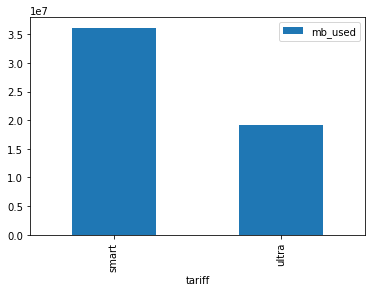

In [116]:
telecom_data.groupby('tariff').agg({'mb_used': 'sum'}).plot(kind='bar')
plt.show()

Потребление интернета также выше с тарифом "Смарт" (36128494.60 Мб), чем с тарифом "Ультра" (19176773.13).

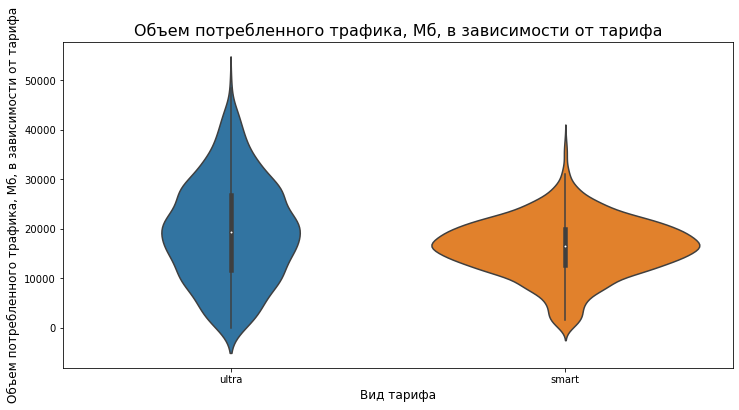

In [117]:
plt.figure(figsize=(12, 6))
plt.grid = True
plt.title('Объем потребленного трафика, Мб, в зависимости от тарифа', fontsize=16) # задаём общий заголовок

sns.violinplot(x="tariff", y="mb_used", data=telecom_data)

plt.xlabel('Вид тарифа',fontsize=12)
plt.ylabel('Объем потребленного трафика, Мб, в зависимости от тарифа', fontsize=12)
plt.show()

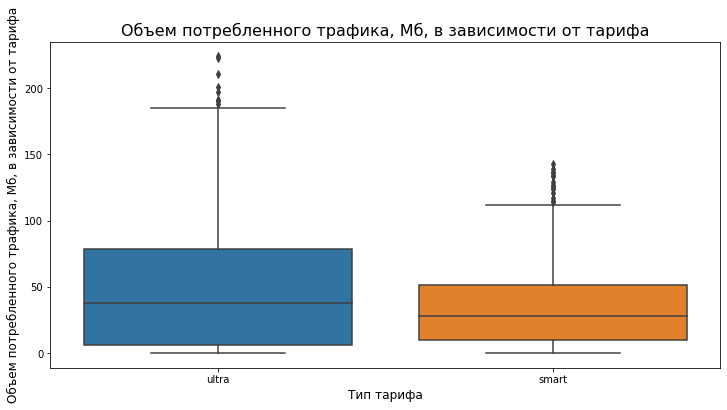

In [118]:
plt.figure(figsize=(12, 6))
plt.grid = True
plt.title('Объем потребленного трафика, Мб, в зависимости от тарифа', fontsize=16) # задаём общий заголовок

sns.boxplot(x="tariff", y="messages_count", data=telecom_data)

plt.xlabel('Тип тарифа',fontsize=12)
plt.ylabel('Объем потребленного трафика, Мб, в зависимости от тарифа', fontsize=12)
plt.show()

Посмотрим не только на суммарные значения, но и средние значения и медианы, а также минимум и максимум в зависимости от тарифа.

In [119]:
telecom_data.pivot_table(index = 'tariff', values = 'revenue_total', aggfunc=['sum', 'mean', 'median', 'min', 'max'])

,sum,mean,median,min,max
,revenue_total,revenue_total,revenue_total,revenue_total,revenue_total
tariff,,,,,
smart,2875901.0,1289.641704,1021.0,550.0,6770.0
ultra,2041050.0,2070.030426,1950.0,1950.0,4800.0


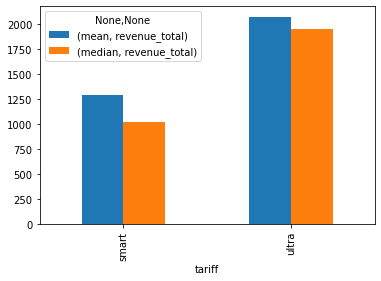

In [120]:
telecom_data.pivot_table(index = 'tariff', values = 'revenue_total', aggfunc=['mean', 'median']).plot(kind='bar')
plt.show()

Видим, что как средние, так и медианные значения выше с тарифом "Ультра".

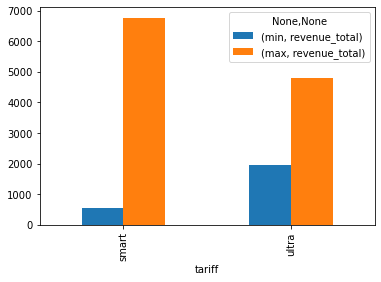

In [121]:
telecom_data.pivot_table(index = 'tariff', values = 'revenue_total', aggfunc=['min', 'max']).plot(kind='bar')
plt.show()

Максимальное значение выше у тарифа "Смарт". Минимальное значение ниже у него же.

### Анализ в зависимости от использования услуг сверх тарифа (по переплатам)

Проведем анализ в зависимости использования услуг сверх тарифа, который может дать важные выводы для исследования.

Рассмотрим категорию тех, кто не платит за дополнительные услуги и не выходит за лимит тарифа по звонкам, сообщениям и трафику. Сгруппируем данные в зависимости от тарифа по общей выручке.

In [122]:
telecom_data[telecom_data['is_over_tariff'] == 0].pivot_table(
    index = 'tariff', values = 'revenue_total', 
    aggfunc=['count', 'mean', 'sum'])

,count,mean,sum
,revenue_total,revenue_total,revenue_total
tariff,,,
smart,568,550.0,312400.0
ultra,852,1950.0,1661400.0


Построим пироговую диаграмму с выделением процентной доли обоих тарифов.

In [123]:
#define data
#data = telecom_data[telecom_data['is_over_tariff'] == 0].pivot_table(index = 'tariff', values = 'revenue_total', aggfunc='sum')
#labels = ['Smart', 'Ultra']

#define Seaborn color palette to use
#colors = sns.color_palette('pastel')[0:5]

#create pie chart
#plt.figure(figsize=(8, 8))
#plt.title('Доли тарифов в выручке среди пользователей, которые пользуются только услугами внутри тарифа ', fontsize=14) # задаём общий заголовок
#plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
#plt.show()

Итак, только 17% общей выручки среди пользователей, которые не выходят сверх лимита, приходится на тариф "Смарт". Большинство (83%) тех, кому хватает услуг внутри тарифа, - это пользователи более дорогого тарифа "Ультра".

Рассмотрим категорию тех клиентов, которым не хватает услуг внутри тарифа, и которые заказывают дополнительные услуги.

In [124]:
telecom_data[telecom_data['is_over_tariff'] == 1].pivot_table(
    index = 'tariff', values = 'revenue_total', 
    aggfunc=['count', 'mean', 'sum'])

,count,mean,sum
,revenue_total,revenue_total,revenue_total
tariff,,,
smart,1662,1542.419374,2563501.0
ultra,134,2833.208955,379650.0


Построим круговую диаграмму.

In [125]:
#define data
#data = telecom_data[telecom_data['is_over_tariff'] == 1].pivot_table(index = 'tariff', values = 'revenue_total', aggfunc='sum')
#labels = ['Smart', 'Ultra']

#define Seaborn color palette to use
#colors = sns.color_palette('pastel')[0:5]

#create pie chart
#plt.figure(figsize=(8, 8))
#plt.title('Доли тарифов в выручке среди пользователей, которые пользуются дополнительными услугами сверх тарифа ', fontsize=14) # задаём общий заголовок
#plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
#plt.show()

Итак, здесь противоположная ситуация: клиентам с тарифом "Ультра" почти всегда (87%) хватает заложенных в тариф услуг, только 13% дозаказывают дополнительные пакеты.

### Статистические показатели

Внутри этого параграфа посчитаем и проанализируем следующие показатели:
 * среднее количество, 
 * дисперсию и 
 * стандартное отклонение.   

#### Среднее количество

In [126]:
telecom_data.groupby('tariff').agg({'messages_count':'mean', 'calls_duration': 'mean', 'mb_used': 'mean'})

,messages_count,calls_duration,mb_used
tariff,,,
smart,33.369058,417.747534,16201.118655
ultra,49.313387,526.089249,19449.059970


По тарифу "Ультра" наблюдаются более высокие средние значения.

#### Стандартное отклонение

In [127]:
telecom_data.groupby('tariff').agg({'messages_count':'std', 'calls_duration': 'std', 'mb_used': 'std'})

,messages_count,calls_duration,mb_used
tariff,,,
smart,28.230396,190.476754,5879.187315
ultra,47.806040,317.887549,10101.095459


Стандартное отклонение выше при тарифе "Ультра" по всем видам услуг. Стандартное отклонение показывает, как распределены значения относительно среднего в нашей выборке. Другими словами, можно понять на сколько велик разброс величины. Сделаем вывод, что разброс средней величины выше с тарифом "Ультра".

#### Дисперсия

Рассчитаем дисперсию по выбранным потребленным услугам.

In [128]:
telecom_data.groupby('tariff').agg({'messages_count':'var', 'calls_duration': 'var', 'mb_used': 'var'})

,messages_count,calls_duration,mb_used
tariff,,,
smart,796.955256,36281.393836,3.456484e+07
ultra,2285.417425,101052.493549,1.020321e+08


In [129]:
#telecom_data.groupby('tariff').agg({'messages_count':'var', 'calls_duration': 'var', 'mb_used': 'var'}).plot(kind='bar')
#plt.show()

In [130]:
#target_columns = ['messages_count', 'calls_duration', 'mb_used']

In [131]:
#for column in target_columns:
    #telecom_data.groupby('tariff').agg({column:'var'}).plot(kind='bar', title="Дисперсия")
#plt.show()

Сделаем вывод, что дисперсия на тарифе "Ультра" немного выше, чем на тарифе "Смарт". Разброс значений с тарифом "Ультра" намного больше. 

### Гистограммы распределения и их описание

#### Распределение выручки по тарифам

Построим диаграммы распределения.

In [132]:
telecom_data['tariff'].unique()

array(['ultra', 'smart'], dtype=object)

'ultra'

,calls_duration,mb_used,messages_count,revenue_total
count,986.000000,986.000000,986.000000,986.000000
mean,526.089249,19449.059970,49.313387,2070.030426
std,317.887549,10101.095459,47.806040,376.015578
min,0.000000,0.000000,0.000000,1950.000000
25%,282.500000,11748.585000,6.000000,1950.000000
50%,518.000000,19304.020000,38.000000,1950.000000
75%,751.750000,26835.885000,78.750000,1950.000000
max,1673.000000,49745.690000,224.000000,4800.000000


'smart'

,calls_duration,mb_used,messages_count,revenue_total
count,2230.000000,2230.000000,2230.000000,2230.000000
mean,417.747534,16201.118655,33.369058,1289.641704
std,190.476754,5879.187315,28.230396,818.370799
min,0.000000,0.000000,0.000000,550.000000
25%,282.000000,12630.035000,10.000000,550.000000
50%,421.500000,16505.475000,28.000000,1021.000000
75%,545.000000,20042.107500,51.000000,1750.000000
max,1435.000000,38552.450000,143.000000,6770.000000


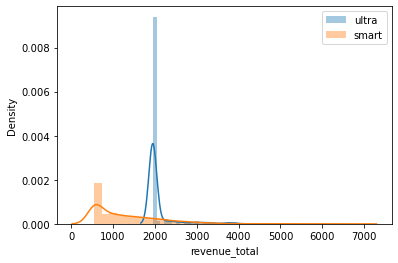

In [133]:
for tariff in telecom_data['tariff'].unique():
    current = telecom_data.query('tariff == @tariff')
    display(tariff, current[['calls_duration', 'mb_used', 'messages_count', 'revenue_total']].describe())
    sns.distplot(current['revenue_total'], label = tariff)
    
plt.legend();

Итак, распределения похожи на распределения Пуассона (предельный случай биномиального распределения). 

#### Распределение потребления услуг

##### Распределение по звонкам

Построим распределение по звонкам по всем имеющимся данным.

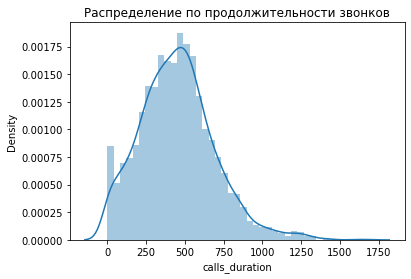

In [134]:
plt.title('Распределение по продолжительности звонков', fontsize=12)
sns.distplot(telecom_data['calls_duration'])
plt.show()

И отдельно по тарифам.

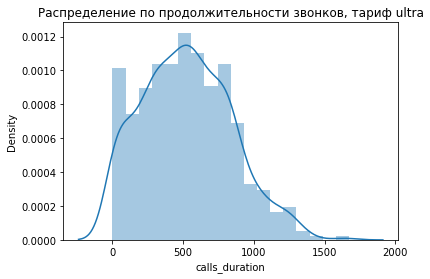

In [135]:
plt.title('Распределение по продолжительности звонков, тариф ultra', fontsize=12)
sns.distplot(telecom_data.query('tariff == "ultra"')['calls_duration'])
plt.show()

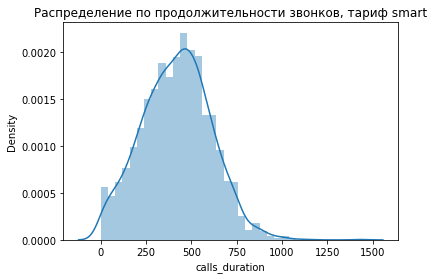

In [136]:
plt.title('Распределение по продолжительности звонков, тариф smart', fontsize=12)
sns.distplot(telecom_data.query('tariff == "smart"')['calls_duration'])
plt.show()

В тарифе "Ультра" больше нулевых значений в распределении, многие пользователи этого тарифа не пользуются звонками. Распределение по тарифу "Смарт" больше похоже на нормальное с небольшой скошенностью вправо. Лимит по тарифу Ультра - 3000 минут, мы видим, что так много почти никто не говорит. По тарифу Смарт пик приходится на 500 минут, включенных в тариф, также пользователи вынуждены докупать дополнительные минуты, потому что им не хватает лимита (есть потребление звонков выше 500 минут).

##### Распределение по потреблению интернет-трафика

Рассмотрим распределение потребления интернет-трафика.

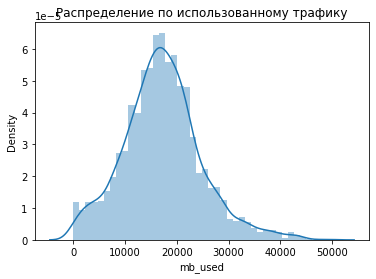

In [137]:
plt.title('Распределение по использованному трафику', fontsize=12)
sns.distplot(telecom_data['mb_used'])
plt.show()

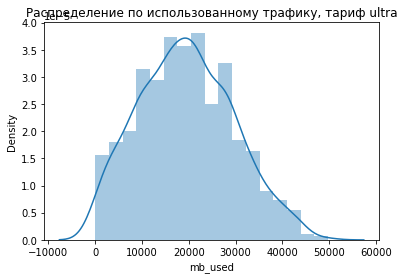

In [138]:
plt.title('Распределение по использованному трафику, тариф ultra', fontsize=12)
sns.distplot(telecom_data.query('tariff == "ultra"')['mb_used'])
plt.show()

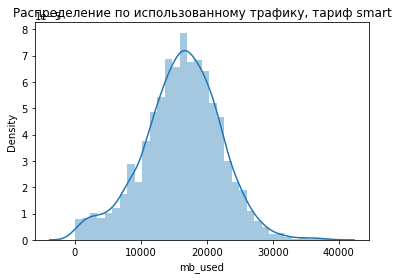

In [139]:
plt.title('Распределение по использованному трафику, тариф smart', fontsize=12)
sns.distplot(telecom_data.query('tariff == "smart"')['mb_used'])
plt.show()

Здесь также видим, что распределение по тарифу "Ультра" имеет больше нулевых значений. Возможно, пользователи тарифа "Ультра" пользуются им ради других услуг. По тарифу Ультра также видим пик в 30 Гб (это лимит тарифа), в Смарт входит 15 Гб, пик выражен меньше - здесь клиентам не хватает трафика и они покупают дополнительный.

##### Распределение по использованию сообщений

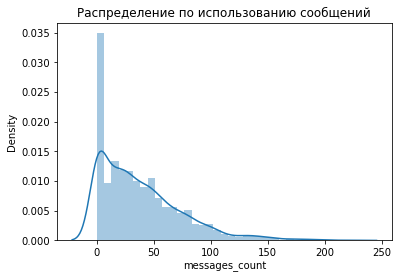

In [140]:
plt.title('Распределение по использованию сообщений', fontsize=12)
sns.distplot(telecom_data['messages_count'])
plt.show()

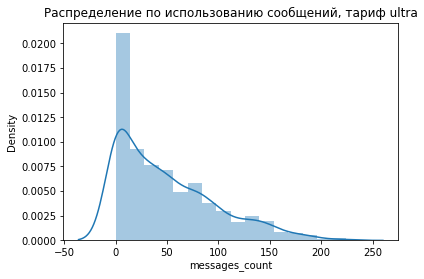

In [141]:
plt.title('Распределение по использованию сообщений, тариф ultra', fontsize=12)
sns.distplot(telecom_data.query('tariff == "ultra"')['messages_count'])
plt.show()

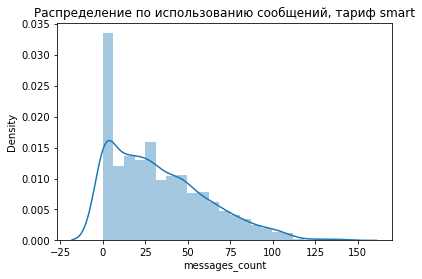

In [142]:
plt.title('Распределение по использованию сообщений, тариф smart', fontsize=12)
sns.distplot(telecom_data.query('tariff == "smart"')['messages_count'])
plt.show()

Сделаем вывод, что услуга SMS сейчас совсем не востребована, сообщения можно отправлять в мессенджерах и социальных сетях. Этот тренд подтверждают все три гистограммы.

## Hypothesis testing and explanations

Проверим следующие гипотезы:
 * средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
 * средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Пороговое значение alpha зададим в 0.05.

Также в работе будут пояснения:
 * как формулировали нулевую и альтернативную гипотезы;
 * какой критерий использовали для проверки гипотез и почему.

Для проверки гипотезы нам понадобятся данные о выручке в зависимости от вида тарифа и города проживания абонента.

In [143]:
telecom_data['revenue_total'].describe()

count    3216.000000
mean     1528.902674
std       798.224060
min       550.000000
25%       750.000000
50%      1653.500000
75%      1950.000000
max      6770.000000
Name: revenue_total, dtype: float64

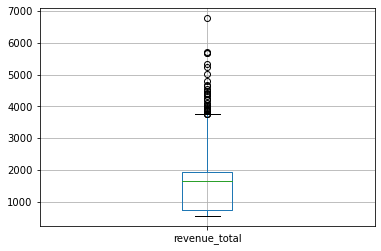

In [144]:
telecom_data.boxplot(column = 'revenue_total')
plt.show()

In [145]:
q1 = telecom_data['revenue_total'].quantile(0.25)
q3 = telecom_data['revenue_total'].quantile(0.75)
iqr = q3 - q1  # iqr (Interquartile range (Межквартильный размах))
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

In [146]:
lower_limit

-1050.0

In [147]:
upper_limit

3750.0

Аномальные значения в данных - ниже 721 и выше 3759.

### Первая гипотеза

#### Формулирование первой и нулевой гипотезы

Гипотеза о равенстве средних двух генеральных совокупностей №1

Сформулируем гипотезы:

 * **H0:** средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается (предположение о том, что связи нет)
 * **H1:** средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

In [148]:
ultra = telecom_data[telecom_data['tariff'] == 'ultra']
#ultra = ultra['revenue_total']

In [149]:
smart = telecom_data[telecom_data['tariff'] == 'smart']
#smart = smart['revenue_total']

Построим ящик с усами.

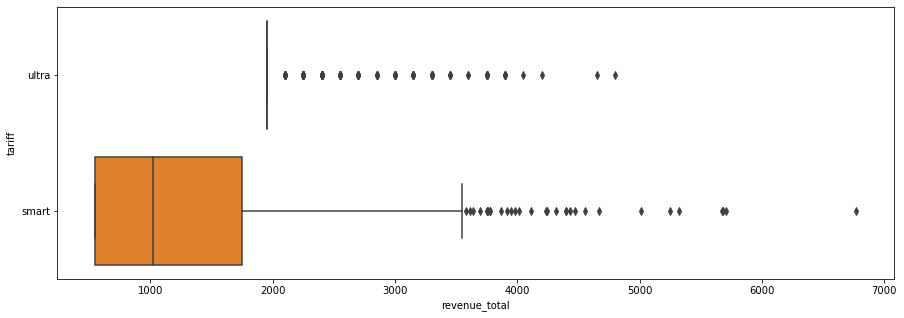

In [150]:
plt.figure(figsize=(15,5))
 
sns.boxplot(data=telecom_data, x='revenue_total', y='tariff')
plt.show()

На ящике с усами видим много выбросов (это черные точки за границами наиболее вероятных значений), поэтому для более точных результатов очистим данные от аномалий.

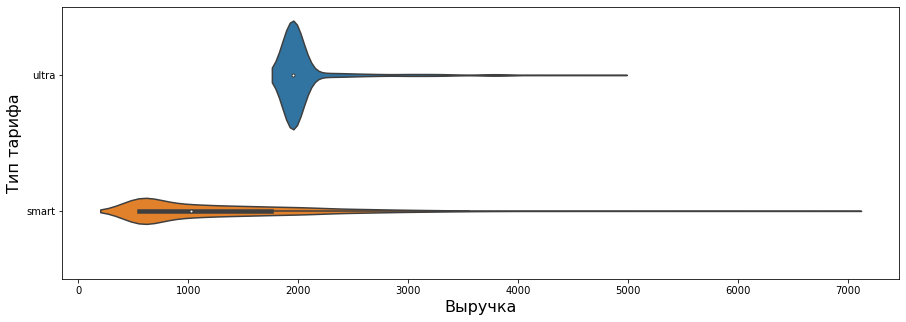

In [151]:
plt.figure(figsize=(15, 5))
plt.grid = True

sns.violinplot(data=telecom_data, x='revenue_total', y='tariff')

plt.xlabel('Выручка',fontsize=16)
plt.ylabel('Тип тарифа', fontsize=16)
plt.show()

In [152]:
smart

,user_id,month,calls_duration,mb_used,messages_count,age,churn_date,city,first_name,last_name,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_calls,revenue_messages,revenue_internet,over_the_tariff,is_over_tariff,revenue_total
986,1001,11.0,430.0,18429.34,0.0,41,NaT,Москва,Иван,Ежов,...,550,200,3,3,0.0,0.0,600.0,600.0,1,1150.0
987,1001,12.0,414.0,14036.66,0.0,41,NaT,Москва,Иван,Ежов,...,550,200,3,3,0.0,0.0,0.0,0.0,0,550.0
988,1002,6.0,117.0,10856.82,4.0,59,NaT,Стерлитамак,Евгений,Абрамович,...,550,200,3,3,0.0,0.0,0.0,0.0,0,550.0
989,1002,7.0,214.0,17580.10,11.0,59,NaT,Стерлитамак,Евгений,Абрамович,...,550,200,3,3,0.0,0.0,600.0,600.0,1,1150.0
990,1002,8.0,289.0,20319.26,13.0,59,NaT,Стерлитамак,Евгений,Абрамович,...,550,200,3,3,0.0,0.0,1000.0,1000.0,1,1550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,9.0,0.0,17206.30,32.0,35,NaT,Санкт-Петербург,Павел,Гончаров,...,550,200,3,3,0.0,0.0,400.0,400.0,1,950.0
3212,1489,10.0,0.0,19559.44,21.0,35,NaT,Санкт-Петербург,Павел,Гончаров,...,550,200,3,3,0.0,0.0,1000.0,1000.0,1,1550.0
3213,1489,11.0,0.0,17491.56,20.0,35,NaT,Санкт-Петербург,Павел,Гончаров,...,550,200,3,3,0.0,0.0,600.0,600.0,1,1150.0
3214,1489,12.0,0.0,17322.51,35.0,35,NaT,Санкт-Петербург,Павел,Гончаров,...,550,200,3,3,0.0,0.0,400.0,400.0,1,950.0


In [153]:
smart['revenue_total'].describe()

count    2230.000000
mean     1289.641704
std       818.370799
min       550.000000
25%       550.000000
50%      1021.000000
75%      1750.000000
max      6770.000000
Name: revenue_total, dtype: float64

In [154]:
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1  # iqr (Interquartile range (Межквартильный размах))
    # границы интервала наиболее вероятных значений
    #print(column, q1 - 1.5 * iqr, q3 + 1.5 * iqr)
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr    
    
    print('Для столбца', column, 'границы наиболее вероятных значений будут от', lower_limit, 'до', upper_limit)    
    df = df.query('@lower_limit <= {} <= @upper_limit'.format(column))

In [155]:
remove_outliers(smart, 'revenue_total')

Для столбца revenue_total границы наиболее вероятных значений будут от -1250.0 до 3550.0


In [156]:
remove_outliers(ultra, 'revenue_total')

Для столбца revenue_total границы наиболее вероятных значений будут от 1950.0 до 1950.0


#### Проверка гипотезы и выводы

Сравниваемые выборки - независимые, поэтому будем использовать t-критерий Стьюдента.

In [157]:
ultra = ultra['revenue_total']

In [158]:
smart = smart['revenue_total']

In [159]:
results = st.ttest_ind(ultra, smart, equal_var=False) # использовала equal_var

In [160]:
results

Ttest_indResult(statistic=37.047170235598124, pvalue=1.927011394420941e-250)

In [161]:
alpha = 0.05

In [162]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.927011394420941e-250
Отвергаем нулевую гипотезу


**Вывод**: Между выборками есть существенное отличие, поэтому мы отвергаем нулевую гипотезу. Выручка пользователей тарифов «Ультра» и «Смарт» различается.

In [163]:
ultra.mean()

2070.030425963489

In [164]:
smart.mean()

1289.6417040358745

Средняя выручка по тарифу Ультра (2029) существенно выше, чем средняя выручка по тарифу "Смарт".

### Вторая гипотеза (о равенстве средних двух генеральных совокупностей)

#### Формулирование первой и нулевой гипотезы

Сформулируем гипотезы:

 * **H0:** средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
 * **H1:** средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [165]:
moscow_region = telecom_data[telecom_data['city'] == 'Москва']
moscow_region = moscow_region['revenue_total']

In [166]:
moscow_region.head()

8     1950.0
9     1950.0
10    1950.0
11    1950.0
12    1950.0
Name: revenue_total, dtype: float64

In [167]:
another_region = telecom_data[telecom_data['city'] != 'Москва']
another_region = another_region['revenue_total']

In [168]:
another_region.head()

0    1950.0
1    1950.0
2    1950.0
3    1950.0
4    1950.0
Name: revenue_total, dtype: float64

#### Проверка гипотезы и выводы

Сравниваемые выборки - независимые, поэтому будем использовать t-критерий Стьюдента.

In [169]:
results = st.ttest_ind(moscow_region, another_region, equal_var=False)

In [170]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5216952110000278
Не получилось отвергнуть нулевую гипотезу


**Вывод**: Итак, вторую гипотезу отвергнуть не получилось. Действительно, средняя выручка пользователей из Москвы выше выручки пользователей из других регионов.

## General conclusion and recommendations

Итак, на этапе **предобработки данных** данные были подготовлены (изменены типы данных, устранены ошибки в данных), а также добавлены расчеты необходимых показателей. 

На этапе **исследовательского анализа** было обнаружно, что:
 * средние показатели потребления услуг отличаются между тарифами;
 * с дешевым тарифом "Смарт" пользователям не хватает включенных в пакет услуг и они докупают дополнительные пакеты;
 * на тарифе "Ультра" пользователям хватает включенных в пакет услуг, но из-за высокой абонентской платы этим тарифом могут пользоваться не все.
 
  Анализ **использования услуг оператора** показал следующее:
 * суммарная длительность звонков выше при использовании тарифа "Смарт" (880 282 мин.), чем при использовании тарифа "Ультра" (74 413 мин.)
 * общее количество сообщений также выше на тарифе "Смарт" (более 70 тыс. шт.), чем на "Ультра" (около 50 тыс. шт.)
 * потребление интернета также выше с тарифом "Смарт" (36128494.60 Мб), чем с тарифом "Ультра" (19176773.13).

Из анализа **статистических показателей** были сделаны такие выводы:
 * по тарифу "Ультра" наблюдаются более высокие средние значения
 * стандартное отклонение выше при тарифе "Ультра" по всем видам услуг. Стандартное отклонение показывает, как распределены значения относительно среднего в нашей выборке. Другими словами, можно понять на сколько велик разброс величины. Сделаем вывод, что разброс средней величины выше с тарифом "Ультра".
 * дисперсия на тарифе "Ультра" немного выше, чем на тарифе "Смарт". Разброс значений с тарифом "Ультра" намного больше.

**Рекомендации оператору "Мегалайн"** - внедрить новый тариф как промежуточное решение между этими двуми тарифами, которое будет иметь среднюю цену, и клиентам будет хватать включенных в пакет услуг (особенно, интернет трафика). 
 
В результате **проверки гипотез** было выявлено, что
 * Между выборками (в зависимости от тарифа) есть существенное отличие, поэтому мы отвергаем нулевую гипотезу. Выручка пользователей тарифов «Ультра» и «Смарт» различается.
 * Итак, вторую гипотезу отвергнуть не получилось. Действительно, средняя выручка пользователей из Москвы выше выручки пользователей из других регионов.